Entendo as avaliações dos clientes.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
review_df=pd.read_csv('olist_order_reviews_dataset.csv')
review_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
#Separando em dois campos de estudo:Vamos estudar separadamente o título e a Descrição da avaliação
review_data_title = review_df['review_comment_title']
review_data = review_df.drop(['review_comment_title'], axis=1)

In [ ]:
#Retirando Valores NaN
review_data = review_data.dropna()
review_data_title = review_data_title.dropna()

In [ ]:
review_data_title

,review_comment_title
9,recomendo
15,Super recomendo
19,Não chegou meu produto
22,Ótimo
34,Muito bom.
...,...
99192,👍
99196,muito bom produto
99197,Não foi entregue o pedido
99199,OTIMA EMBALAGEM


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
comments = []
stop_words = set(stopwords.words('portuguese'))
for words in review_data  ['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ", words) #somente letras
    tokens = nltk.word_tokenize(only_letters) #quebra as frases
    lower_case = [l.lower() for l in tokens ] # todas as palavras lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #removendo stop words
    comments.append(' '.join(filtered_result))#Remove stpwords

In [ ]:
comments

['recebi bem antes prazo estipulado',
 'parab ns lojas lannister adorei comprar internet seguro pr tico parab ns todos feliz p scoa',
 'aparelho eficiente site marca aparelho impresso desinfector chegar outro nome atualizar marca correta vez aparelho',
 'pouco travando valor ta boa',
 'vendedor confi vel produto ok entrega antes prazo',
 'gostaria saber sempre recebi compra agora decpcionou',
 'p ssimo',
 'loja nota',
 'obrigado aten amim dispensada',
 'compra realizada facilmente entrega efetuada antes prazo dado produto j come usado at presente problemas',
 'rel gio bonito barato',
 'n gostei comprei gato lebre',
 'sempre compro internet entrega ocorre antes prazo combinado acredito prazo m ximo stark prazo m ximo j esgotou ainda n recebi produto',
 'recebi exatamente esperava demais encomendas outros vendedores atrasaram chegou prazo',
 'recomendo',
 'boa',
 't completamente apaixonada loja super respons vel confi vel',
 'nada chegar pedido',
 'bom cheiroso',
 'otimo vendedor chegou

<Figure size 1500x800 with 0 Axes>

(-0.5, 999.5, 499.5, -0.5)

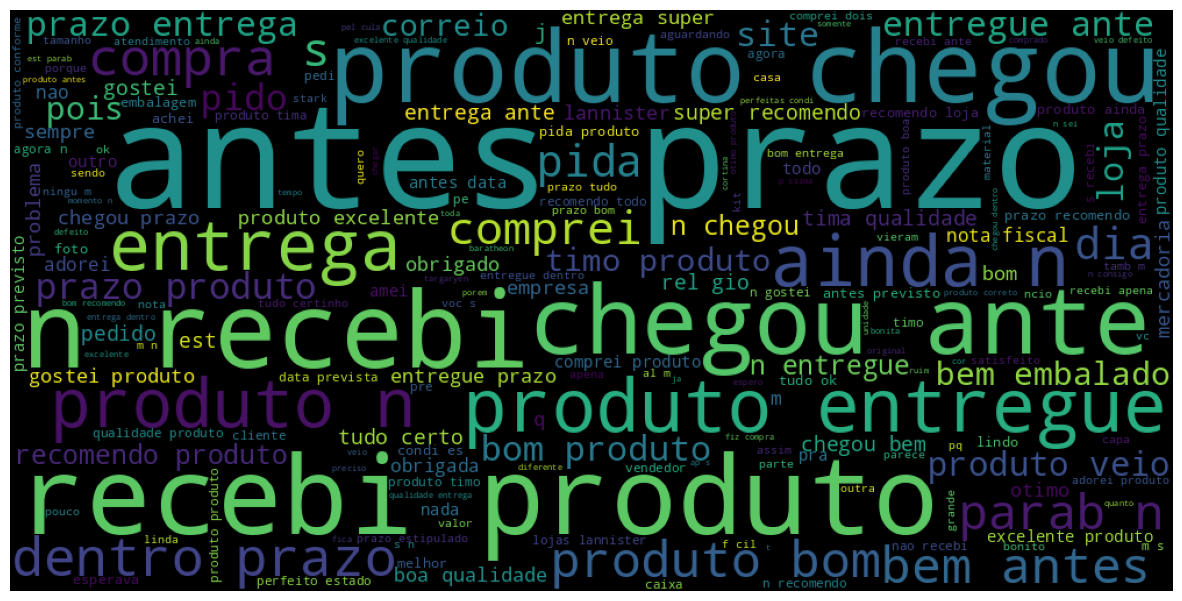

In [ ]:
#usar o wordcloud pra ver os comentários
unique_string = (" ").join(comments)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#Using CountVectorizer pra ter as palavras com maior peso (unigram é uma palavra)
co= CountVectorizer(ngram_range=(1,1))#analisar uma palavra por vez
#Using CountVectorizer pra ter as palavras com maior peso (unigram é uma palavra)
co= CountVectorizer(ngram_range=(1,1))#analisar uma palavra por vez
counts = co.fit_transform(comments)
important_unigrams = pd.DataFrame(
    data=counts.sum(axis=0).A1,  # Soma as frequências de cada palavra
    index=co.get_feature_names_out(),  # Obtém os nomes das palavras
    columns=["frequency"]  # Nome da coluna de frequências
)
important_unigrams = important_unigrams.sort_values(by="frequency", ascending=False)
print(important_unigrams)

                   frequency
produto                18429
prazo                   8475
entrega                 6532
antes                   5626
chegou                  5555
...                      ...
margarina                  1
consideravelmente          1
considerei                 1
marerial                   1
zxdad                      1

[14077 rows x 1 columns]


In [ ]:
co= CountVectorizer(ngram_range=(2,2))#analisar duas palavra por vez
counts = co.fit_transform(comments)
important_bigrams = pd.DataFrame(
    data=counts.sum(axis=0).A1,  # Soma as frequências de cada palavra
    index=co.get_feature_names_out(),  # Obtém os nomes das palavras
    columns=["frequency"]  # Nome da coluna de frequências
)
important_bigrams = important_bigrams.sort_values(by="frequency", ascending=False)
print(important_bigrams)

                  frequency
antes prazo            4193
recebi produto         1873
produto chegou         1700
produto entregue       1595
chegou antes           1460
...                     ...
espero novas              1
espero nao                1
espero mesma              1
espero meses              1
zupin tx                  1

[109304 rows x 1 columns]


In [ ]:
co = CountVectorizer(ngram_range=(3, 3))  # Analisar uma palavra por vez (unigramas)

# Transformar os comentários em uma matriz esparsa
counts = co.fit_transform(comments)

# Obter os nomes das palavras (features) e as frequências
feature_names = co.get_feature_names_out()
frequencies = counts.sum(axis=0).A1  # Soma as frequências de cada palavra

# Criar um DataFrame com os nomes das palavras e suas frequências
important_trigrams = pd.DataFrame(
    {"unigram": feature_names, "frequency": frequencies}
)

# Ordenar as palavras pela frequência em ordem decrescente
important_trigrams = important_trigrams.sort_values(by="frequency", ascending=False)

# Exibir o resultado
print(important_trigrams)

                         unigram  frequency
25443         chegou antes prazo       1108
15414            bem antes prazo        706
57184       entregue antes prazo        608
119325      produto chegou antes        448
54011        entrega antes prazo        432
...                          ...        ...
57307       entregue bolsa porta          1
57308         entregue bom antes          1
57310        entregue boneca qdo          1
57311   entregue brinde obrigado          1
164157               zupin tx gb          1

[164158 rows x 2 columns]


<Figure size 1400x600 with 0 Axes>

<Axes: xlabel='review_score', ylabel='count'>

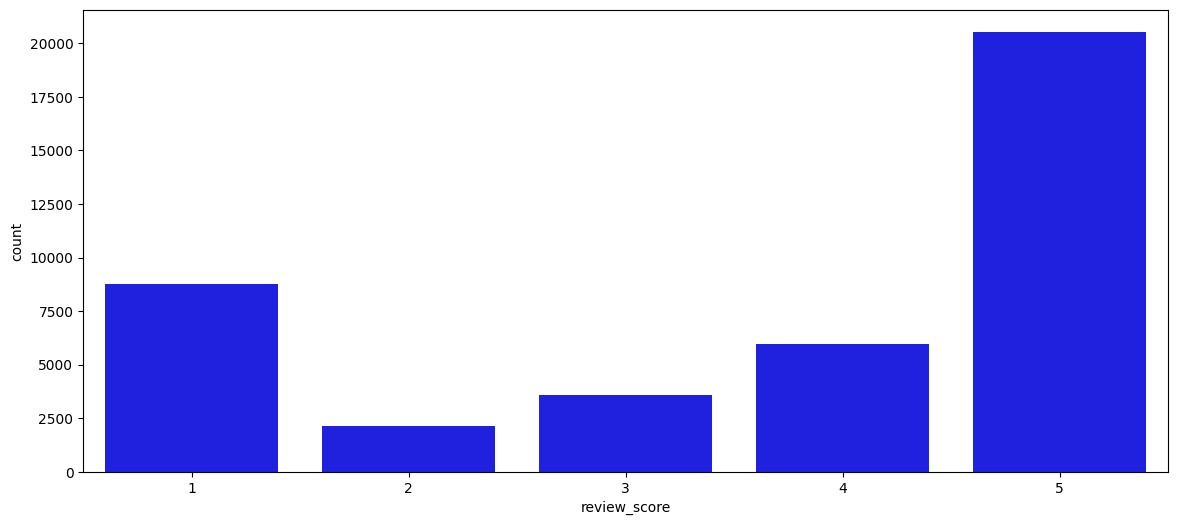

In [ ]:
#Antes de remover Nan values
plt.figure(figsize=(14,6))
sns.countplot(x=review_data['review_score'], color = 'blue')


<Figure size 1400x600 with 0 Axes>

<Axes: xlabel='review_score', ylabel='count'>

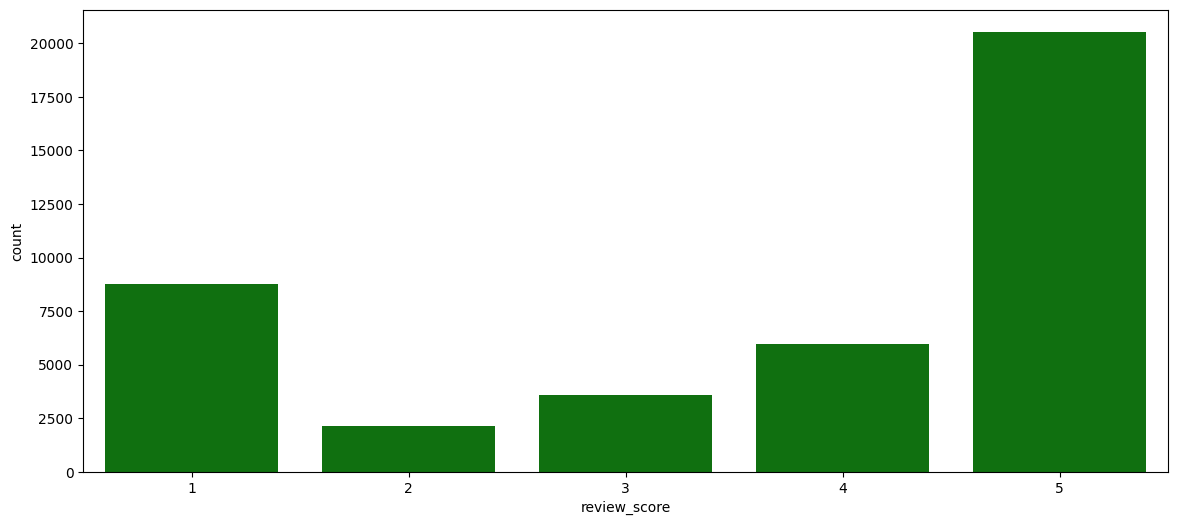

In [ ]:
#Depois de Remover valores Nan
plt.figure(figsize=(14,6))
sns.countplot(x=review_data['review_score'], color = 'Green')

In [ ]:
#Agora analisando os titulos
comments_titles= []
stop_words = set(stopwords.words('portuguese'))

for words in review_data_title:
  only_letters = re.sub("[^a-zA-Z]", " ", words) #somente
  tokens = nltk.word_tokenize(only_letters) #quebra as frases
  lower_case = [l.lower() for l in tokens ] # todas as palavras lower case
  filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #removendo stop words
  comments_titles.append(' '.join(filtered_result))#Remove stopwords

In [ ]:
comments_titles

['recomendo',
 'super recomendo',
 'n chegou produto',
 'timo',
 'bom',
 'bom',
 'maravilhoso',
 'entrega perfeita',
 'timo',
 'mt lindo',
 'timo produto',
 'recomendo sempre',
 'recomendo',
 'n recebi produto',
 'otimo',
 'entrega atrasou',
 'boa',
 '',
 'm dio',
 'prazo entrega',
 'super produto',
 'falta produto quebra',
 'super recomendo',
 'n recebi ainda',
 'recomendo',
 'nota',
 'suspense',
 'entrega antes previsto',
 'recomendo',
 'top',
 'produto show',
 'super recoendo',
 'erraram caixa ac stica',
 'tima compra',
 'horr vel',
 'super recomendo',
 'bom',
 'otimo',
 '',
 'recomendo',
 'bom',
 'lamenet vel',
 'qualidade ruim',
 'insatisfeito',
 'mega recomendo',
 'excelente produto',
 'recomendo',
 'nao entrega produto',
 'recomendo',
 'captador presys blend',
 'produto pirata',
 'produto fraco',
 'nota',
 'tudo certo',
 'recomendo',
 'timo',
 'otimo',
 'perfeito',
 'lol pet',
 'bom',
 'excelente',
 '',
 'timo custo x benef cio',
 'bom',
 'produto entrega timos',
 'produto ok',


<Figure size 1500x800 with 0 Axes>

(-0.5, 1999.5, 999.5, -0.5)

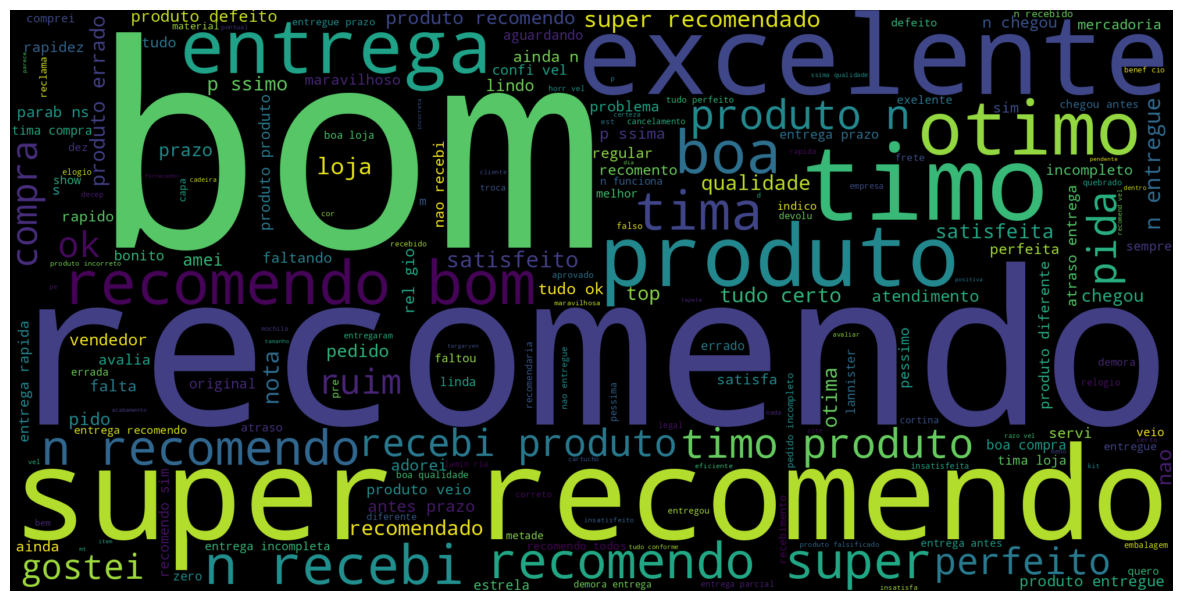

In [ ]:
#usar wordcloud para visualizar os comentários dos títulos
unique_string = (" ").join(comments_titles)
wordcloud = WordCloud(width = 2000, height = 1000).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Buscar unigrama (palavra)
co= CountVectorizer(ngram_range=(1,1))#analisar uma palavra por vez
counts = co.fit_transform(comments_titles)
important_unigrams_title = pd.DataFrame(
    data=counts.sum(axis=0).A1,  # Soma as frequências de cada palavra
    index=co.get_feature_names_out(),  # Obtém os nomes das palavras
    columns=["frequency"]  # Nome da coluna de frequências
)
important_unigrams_title = important_unigrams_title.sort_values(by="frequency", ascending=False)
print(important_unigrams_title)

           frequency
recomendo       2071
bom             1315
produto         1290
super            896
timo             730
...              ...
free               1
fraude             1
fragil             1
fragi              1
zo                 1

[1876 rows x 1 columns]


In [ ]:
#Buscar bigrama (duas palavras)
co= CountVectorizer(ngram_range=(2,2))#analisar duas palavras por vez
counts = co.fit_transform(comments_titles)
important_bigrama_title = pd.DataFrame(
    data=counts.sum(axis=0).A1,  # Soma as frequências de cada duas palavras
    index=co.get_feature_names_out(),  # Obtém os nomes das palavras
    columns=["frequency"]  # Nome da coluna de frequências
)
important_bigrama_title = important_bigrama_title.sort_values(by="frequency", ascending=False)
print(important_bigrama_title)

                   frequency
super recomendo          678
recebi produto           121
timo produto             103
super recomendado        101
produto entregue          98
...                      ...
faluana receber            1
farol led                  1
farol milha                1
fase teste                 1
zero vou                   1

[2632 rows x 1 columns]


In [ ]:
#Buscar trigrama (três palavras)
co= CountVectorizer(ngram_range=(3,3))#analisar três palavras por vez
counts = co.fit_transform(comments_titles)
important_bigrama_title = pd.DataFrame(
    data=counts.sum(axis=0).A1,  # Soma as frequências de cada três palavras
    index=co.get_feature_names_out(),  # Obtém os nomes das palavras
    columns=["frequency"]  # Nome da coluna de frequências
)
important_trigrama_title = important_bigrama_title.sort_values(by="frequency", ascending=False)
print(important_trigrama_title)

                     frequency
entrega super pida          27
entrega antes prazo         15
custo benef cio             12
chegou antes prazo          11
nao recebi produto          11
...                        ...
ja pedi devolucao            1
jeane jesus silva            1
jeito est an                 1
jogo len ol                  1
zero vou procom              1

[927 rows x 1 columns]


In [ ]:
#Checar a porcentagem de reviews.


Este seria um caso de aprendizado supervisionado, portanto, teríamos que criar uma nova coluna representado a pontuação de sentimento (1 ou 0). 1 é para palavras positivas e 0, para palavras negativas. Excluiríamos a pontuação de revisão de 3 pontos porque representa neutra e incluiríamos as pontuações de 1 e 2  como palavras negativas e as pontuações de 4 e 5 na revisão para palavras positivas.

In [ ]:
#mapeando os ratings
review_data['Sentiment_rating'] = np.where(review_data.review_score >=3,1,0)

In [ ]:
#removendo avaliações neutras
review_data= review_data[review_data.review_score !=3]

In [ ]:
#Imprimir a contagem de cada classe
review_data['Sentiment_rating'].value_counts()

,count
Sentiment_rating,
1,30087
0,10890


In [ ]:
review_data.head()
review_data['Sentiment_rating'].shape

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,Sentiment_rating
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,1
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,1
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,1


(37420,)

In [ ]:
comments = []
stop_words = set(stopwords.words('portuguese'))
for words in review_data  ['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ", words) #somente
    tokens=nltk.word_tokenize(only_letters) #quebra as frases
    lower_case = [l.lower() for l in tokens ] # todas as palavras lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #removendo stop words

    comments.append(' '.join(filtered_result))#Remove stopwords

In [ ]:
co_counts = CountVectorizer(stop_words = list(stopwords.words('portuguese')), # Change stop_words to a list
ngram_range = (1,4))
co_data = co_counts.fit_transform(comments)

In [ ]:
co_data

<37420x402321 sparse matrix of type '<class 'numpy.int64'>'
	with 833979 stored elements in Compressed Sparse Row format>

In [ ]:
x_train_co, x_test_co, y_train_co,y_test_co = train_test_split(co_data,review_data['Sentiment_rating'],test_size= 0.2, random_state=7)

In [ ]:
#70% dos sentimentos são classificados como positivo
#30% dos sentimentos são classificados como negativo
y_train_co.value_counts()/y_train_co.shape[0]

,count
Sentiment_rating,
1,0.708612
0,0.291388


In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train_co,y_train_co)

LogisticRegression()

In [ ]:
#Prevendo os resultados

test_pred = lr_model.predict(x_test_co)

test_pred_co = linear_model.predict(x_test_co)
print("Acurácia: "), accuracy_score(y_test_co,test_pred)
print("F1 score "), f1_score(y_test_co,test_pred_co)
print("Confusion Matrix: "), confusion_matrix(y_test_co,test_pred_co)

Acurácia: 


(None, 0.9257081774452165)

F1 score 


(None, 0.9480955937266616)

Confusion Matrix: 


(None,
 array([[1850,  317],
        [ 239, 5078]]))

In [ ]:
# Criando o DataFrame com palavras e pesos
lr_weights = pd.DataFrame(
    list(zip(co_counts.get_feature_names_out(), lr_model.coef_[0])),
    columns=['words', 'weights']
)

# Selecionando as 15 palavras com os maiores pesos (indicando sentimentos positivos)
Positive_sentiments = lr_weights.sort_values(['weights'], ascending=False).head(15)

# Exibindo os 15 trigramas mais positivos
print("Palavras ou trigramas com maior peso (sentimentos positivos):")
print(Positive_sentiments)



Palavras ou trigramas com maior peso (sentimentos positivos):
             words   weights
158281   excelente  3.050789
370770        timo  3.024967
243896       otimo  2.805064
263047        pido  2.680999
16388         amei  2.620073
44366          bom  2.590873
205208       lindo  2.450177
259763    perfeito  2.425901
5757        adorei  2.351462
262005        pida  2.310536
238935    obrigada  2.301617
343043  satisfeito  2.269904
243657       otima  2.238244
369934        tima  2.154472
42415          boa  2.041371
